### Energy Price Prediction

TODO: project description



In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


print(np.array([1, 2, 3]))
print("numpy is imported")


[1 2 3]
numpy is imported


### Load data by csv file
Read the csv files

In [104]:
# Read csv
df = pd.read_csv("../data/germany_epex_spot.csv")


### Construct DataFrames

In [105]:
# convert local time in datetime object and set as index
df["Datetime (Local)"] = pd.to_datetime(df["Datetime (Local)"])
df = df.set_index("Datetime (Local)")
df = df.sort_index()

# target variable
df["price"] = df["Price (EUR/MWhe)"]

# time based features
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday
df["month"] = df.index.month

# lag features (price 1h and 24h before)
df["lag_1"] = df["price"].shift(1)
df["lag_24"] = df["price"].shift(24)

# df.plot(style="1", figsize=(15, 5), title="Data Frame")


### Clean up the data


In [106]:
# remove rows with NaN (because of shift)
df = df.dropna()



### Define our feature set and the target variable

In [107]:
# Define feature set and target variable 
features = ["hour", "weekday", "month", "lag_1", "lag_24"]
X = df[features]
y = df["price"]

### Split train and test data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)



Make sure that the data is not split randomly, but instead chronologically, so that the model is trained on past data and tested on future data.

In [109]:
# Für X_train
print("X_train:")
print("  Zeilen:", len(X_train))
print("  Zeitraum:", X_train.index.min(), "bis", X_train.index.max())

# Für X_test
print("X_test:")
print("  Zeilen:", len(X_test))
print("  Zeitraum:", X_test.index.min(), "bis", X_test.index.max())

# Für y_train
print("y_train:")
print("  Zeilen:", len(y_train))
print("  Zeitraum:", y_train.index.min(), "bis", y_train.index.max())

# Für y_test
print("y_test:")
print("  Zeilen:", len(y_test))
print("  Zeitraum:", y_test.index.min(), "bis", y_test.index.max())

X_train:
  Zeilen: 72145
  Zeitraum: 2015-01-02 01:00:00 bis 2023-03-27 02:00:00
X_test:
  Zeilen: 18037
  Zeitraum: 2023-03-27 03:00:00 bis 2025-04-16 22:00:00
y_train:
  Zeilen: 72145
  Zeitraum: 2015-01-02 01:00:00 bis 2023-03-27 02:00:00
y_test:
  Zeilen: 18037
  Zeitraum: 2023-03-27 03:00:00 bis 2025-04-16 22:00:00


### Create and train model (XGBRegressor for now)

In [110]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Predict and evaluate

In [111]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f} EUR/MWh")

RMSE: 13.30 EUR/MWh


### Plot real prices against the predicted prices

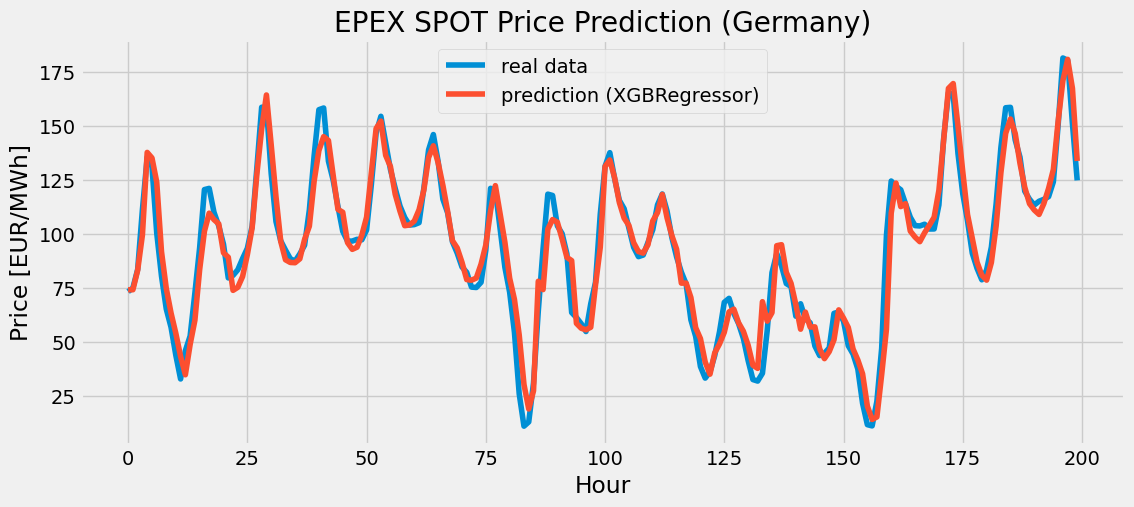

In [112]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="real data")
plt.plot(y_pred[:200], label="prediction (XGBRegressor)")
plt.legend()
plt.title("EPEX SPOT Price Prediction (Germany)")
plt.xlabel("Hour")
plt.ylabel("Price [EUR/MWh]")
plt.show()